In [1]:
print("all ok")

all ok


In [2]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from typing import List,Annotated,Literal

In [3]:
class MyGraph(StateGraph):
    message : str

In [4]:
def agent(state):
    pass

def grade_documents(state) -> Literal["generate", "rewrite"]:
    pass

def rewrite(state) :
    pass

def generate(state):
    pass

In [5]:
graph = StateGraph(MyGraph)

graph.add_node("agent",agent)
retriver = ToolNode([])
graph.add_node("retriver",retriver)
graph.add_node("rewrite",rewrite)   
graph.add_node("generate",generate)

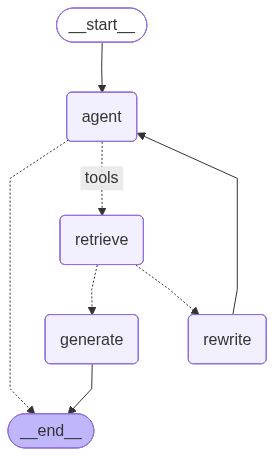

: 

In [ ]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(MyGraph)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [4]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
urls=["https://www.geeksforgeeks.org/artificial-intelligence/what-is-an-ai-prompt-engineering/","https://www.geeksforgeeks.org/artificial-intelligence/what-is-chain-of-thought-prompting/","https://www.geeksforgeeks.org/artificial-intelligence/react-reasoning-acting-prompting/"]

docs=[WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://www.geeksforgeeks.org/artificial-intelligence/what-is-an-ai-prompt-engineering/', 'title': 'What is an AI Prompt Engineering - GeeksforGeeks', 'description': 'Your All-in-One Learning Portal: GeeksforGeeks is a comprehensive educational platform that empowers learners across domains-spanning computer science and programming, school education, upskilling, commerce, software tools, competitive exams, and more.', 'language': 'en-US'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWhat is an AI Prompt Engineering - GeeksforGeeks\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nCoursesDSA / PlacementsGATE PrepML & Data ScienceDevelopmentCloud / DevOpsProgramming LanguagesAll CoursesTutorialsPythonJavaDSAML & Data ScienceInterview CornerProgramming LanguagesWeb DevelopmentGATECS SubjectsDevOpsScho

In [10]:
# Setup paths for importing from src
import sys
import os

# Get the project root directory
project_root = os.path.abspath(".")
src_dir = os.path.join(project_root, "src")

# Add both to sys.path so all imports work
if project_root not in sys.path:
    sys.path.insert(0, project_root)
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

# Now import chatbot from main
from src.main import chatbot

print("chatbot imported successfully!")
print(f"Type: {type(chatbot)}")

ModuleNotFoundError: No module named 'pywintypes'